**IMAGE DATA (Fashion MNIST)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load example image dataset (replace with Kaggle image dataset)
(X_train_img, y_train_img), (X_test_img, y_test_img) = fashion_mnist.load_data()
# Normalize pixel values
X_train_img = X_train_img / 255.0
X_test_img = X_test_img / 255.0
# One-hot encode labels
y_train_img = to_categorical(y_train_img)
y_test_img = to_categorical(y_test_img)
# Split into train, validation, test
X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(
X_train_img, y_train_img, test_size=0.15, random_state=42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build ANN for image data
model_img = Sequential([
Flatten(input_shape=(28, 28)),

Dense(256, activation='relu'),
Dropout(0.3),
Dense(10, activation='softmax') # 10 classes
])
model_img.compile(
optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_img = model_img.fit(
X_train_img, y_train_img,
validation_data=(X_val_img, y_val_img),
epochs=20, batch_size=64,
callbacks=[early_stop],
verbose=1
)
# Evaluate
loss_img, acc_img = model_img.evaluate(X_test_img, y_test_img, verbose=0)

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7478 - loss: 0.7229 - val_accuracy: 0.8478 - val_loss: 0.4206
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8517 - loss: 0.4151 - val_accuracy: 0.8661 - val_loss: 0.3763
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8638 - loss: 0.3810 - val_accuracy: 0.8683 - val_loss: 0.3613
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8698 - loss: 0.3570 - val_accuracy: 0.8761 - val_loss: 0.3390
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8760 - loss: 0.3342 - val_accuracy: 0.8809 - val_loss: 0.3293
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8827 - loss: 0.3183 - val_accuracy: 0.8801 - val_loss: 0.3324
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8843 - loss: 0.3110 - val_accuracy: 0.8821 - val_loss: 0.3233
Epoch 8/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8901 - loss: 0.2995 - val_accuracy


===== FINAL RESULTS =====
Image Data Accuracy: 0.8838, Loss: 0.3249


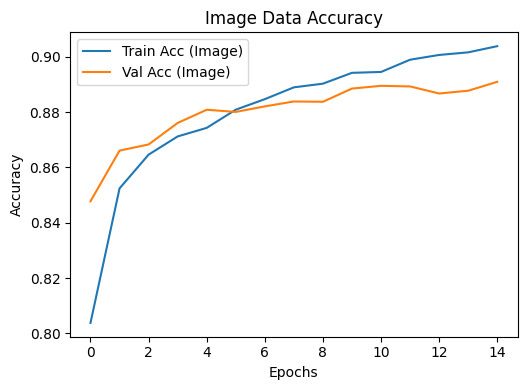

In [ ]:
print("\n===== FINAL RESULTS =====")
print(f"Image Data Accuracy: {acc_img:.4f}, Loss: {loss_img:.4f}")
# Plot accuracy curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_img.history['accuracy'], label='Train Acc (Image)')
plt.plot(history_img.history['val_accuracy'], label='Val Acc (Image)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Image Data Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Build improved ANN model
model_img = Sequential([
    Flatten(input_shape=(28, 28)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_img.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history_img = model_img.fit(
    X_train_img, y_train_img,
    validation_data=(X_val_img, y_val_img),
    epochs=25,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/25
797/797 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7802 - loss: 0.6224 - val_accuracy: 0.8384 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 2/25
797/797 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8461 - loss: 0.4162 - val_accuracy: 0.8486 - val_loss: 0.4007 - learning_rate: 0.0010
Epoch 3/25
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8602 - loss: 0.3740 - val_accuracy: 0.8201 - val_loss: 0.4557 - learning_rate: 0.0010
Epoch 4/25
794/797 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8669 - loss: 0.3590
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
797/797 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8669 - loss: 0.3590 - val_accuracy: 0.8490 - val_loss: 0.4158 - learning_rate: 0.0010
Epoch 5/25
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8832 - loss: 0.3175 - val_accuracy: 0.8794 - val_loss: 0.3247 - learning_rate: 5.0000e-04
Epoch 6/25
797/797 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8898 -

KeyboardInterrupt: 